In [1]:
numbers = '23456789TJQKA'
colors = '红黑方梅'
joker = 'Xy'
def numbers_value(n):
    position_value = numbers.find(n) + 2
    
    if n == 'X' or n == 'y':
        return list(range(1,15))
    
    if n == 'A':
        return position_value, 1
    
    else:
        return position_value,
    

In [2]:
numbers_value('X')

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [3]:
from itertools import product
one_suite_cards = [
    c+n for c, n in product(numbers,colors)
]
one_suite_cards.append('XX')
one_suite_cards.append('yy')

In [4]:
len(one_suite_cards * 2)

108

In [5]:
len(one_suite_cards)

54

In [6]:
import random
random.shuffle(one_suite_cards)

In [7]:
def distribute_hand(people_n,card_n = 3,with_joker=False,multi_suite = False):
    
#     card_n = 3
    
    
    
    one_suite_cards = [
        c+n for c, n in product(numbers,colors)
    ]
    
    if with_joker:
        one_suite_cards.append('XX')
        one_suite_cards.append('yy')
    
    if multi_suite:
        suite_nums = int(( people_n * card_n ) * 1.0 / 54) + 1
        suite_cards = one_suite_cards * suite_nums
#     print(len(suite_cards))
    
        random.shuffle(suite_cards)
        random_hand = []
    #     start = 0
    #     for i in range(people_n):
    #         start += i * card_n
    #         random_hand.append(one_suite_cards[start:start+card_n])

        random_hand = [suite_cards[i * card_n:i * card_n + card_n] for i in range(people_n)]
    
    else:
        random.shuffle(one_suite_cards)
        random_hand = []
        start,j = 0,0
        for i in range(people_n):
            start = j * card_n
#             print('j:{},start:{},card_n:{}'.format(j,start,card_n))
            j += 1
#             print(start)
            if start + card_n > len(one_suite_cards):
                random.shuffle(one_suite_cards)
#                 print(one_suite_cards)
                start = 0
                j = 0
            random_hand.append(one_suite_cards[start:start+card_n])
#             print(one_suite_cards[start:start+card_n])
#             print(start,start+card_n)
            

    return random_hand

    

In [8]:
random_hand = distribute_hand(78,True,False)

In [9]:
len(random_hand)

78

In [30]:
def is_flush(hand): #同花
    
    if len(set(c for _, c in hand)) == 2:
        for _,c in hand:
            if c == 'X'or c == 'y':
                return True
        
    return len(set(c for _, c in hand)) == 1

In [31]:
is_flush(['9红',
 'XX',
 '4红',])

True

In [32]:
def ascend(numbers):
    sorted_n = sorted(numbers)
    return sorted_n[2] - sorted_n[1] == sorted_n[1] - sorted_n[0] == 1

def is_straight(hand): #拖拉机

    possible_numbers = [numbers_value(n) for n,_ in hand]
    
#     print (possible_numbers)
    
    all_combination = list(product(*possible_numbers))
#     print (all_combination)
    return any(ascend(h) for h in all_combination)
   

In [33]:
is_straight(['3红',
 '4黑',
 '5方',])

True

In [43]:
from collections import Counter
FLUSH,STRIGHT = 'flush','straight'
total_hand = 10000
def get_poker_env(people,round_number=10000):
    poker_counter = Counter()
#     FLUSH,STRIGHT = 'flush','straight'
    total_hand = 0
    for t in range(round_number):
        for hand in distribute_hand(people,3,True,True):
            total_hand += 1
            if is_flush(hand):
                poker_counter[FLUSH] += 1
            elif is_straight(hand):
                poker_counter[STRIGHT] += 1
    return poker_counter
    

In [44]:
poker_counter = get_poker_env(3)

In [45]:
poker_counter[FLUSH] / total_hand

0.2131

In [46]:
poker_counter[STRIGHT] / total_hand

0.1673

In [47]:
rate = poker_counter[FLUSH] / poker_counter[STRIGHT] 

In [48]:
rate

1.273759713090257

In [49]:
from tqdm import tqdm_notebook

In [50]:
people_numbers= range(2, 17)
r = 50000
rates = []
for n in tqdm_notebook(people_numbers):
    result = get_poker_env(n,r)
    rates.append(result[FLUSH] / result[STRIGHT] )

/var/folders/dr/3bsmb4j928bcx76mh_1dfx1r0000gn/T/ipykernel_6722/1836153485.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm_notebook(people_numbers):


  0%|          | 0/15 [00:00<?, ?it/s]

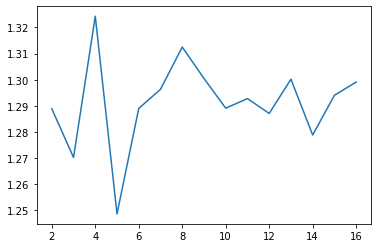

In [51]:
import matplotlib.pyplot as plt
plt.plot(people_numbers, rates)


# 五张牌

In [51]:
# def distribute_hand(people_n,card_n = 5,with_joker=False,multi_suite = False): #发牌函数
    
# #     card_n = 5
    
    
    
#     one_suite_cards = [
#         c+n for c, n in product(numbers,colors)
#     ]
    
#     if with_joker:
#         one_suite_cards.append('JK')
#         one_suite_cards.append('jk')
    
#     if multi_suite:
#         suite_nums = int(( people_n * card_n ) * 1.0 / 54) + 1
#         suite_cards = one_suite_cards * suite_nums
    
#         random.shuffle(suite_cards)
#         random_hand = []
#         random_hand = [suite_cards[i * card_n:i * card_n + card_n] for i in range(people_n)]
    
#     else:
#         random.shuffle(one_suite_cards)
#         random_hand = []
#         start,j = 0,0
#         for i in range(people_n):
#             start = j * card_n
#             j += 1
#             if start + card_n > len(one_suite_cards):
#                 random.shuffle(one_suite_cards)
#                 start = 0
#                 j = 0
#             random_hand.append(one_suite_cards[start:start+card_n])

#     return random_hand

    

In [150]:
def ascend(numbers):
    sorted_n = sorted(numbers)
    return sorted_n[4] - sorted_n[3] == sorted_n[3] - sorted_n[2] == sorted_n[2] - sorted_n[1] == sorted_n[1] - sorted_n[0] == 1

def is_straight(hand): #拖拉机

    possible_numbers = [numbers_value(n) for n,_ in hand]
    
#     print (possible_numbers)
    
    all_combination = list(product(*possible_numbers))
#     print (all_combination)
    return any(ascend(h) for h in all_combination)

In [151]:
def is_straight_flush(hand): # 五个花色相同并且还是顺子
    return is_straight(hand) and is_flush(hand)

In [152]:
def asc(numbers):
    sorted_n = sorted(numbers)
    return len(set(sorted_n[1:-1])) == 1 and (sorted_n[4] - sorted_n[3] <= 1 or sorted_n[1] - sorted_n[0] <= 1)
def is_four_of_one_kind(hand): # 四个数字相同
#     print(hand)
    possible_numbers = [numbers_value(n) for n,_ in hand]
#     print(possible_numbers)
    all_combination = list(product(*possible_numbers))
    return any(asc(h) for h in all_combination)
    

In [153]:
is_four_of_one_kind(['A红', 'A方', 'A方', 'XX', '4红'])

True

In [154]:
def aaa_bb(numbers):
    sorted_n = sorted(numbers)
#     print (sorted_n)
#     print (sorted_n[:2])
    return len(set(sorted_n[:2])) == 1 and len(set(sorted_n[-2:])) == 1 and ((sorted_n[2] == sorted_n[0]) or (sorted_n[2] == sorted_n[-1]))

def is_full_house(hand):
#     print(hand)
    possible_numbers = [numbers_value(n) for n,_ in hand]
#     print(possible_numbers)
    all_combination = list(product(*possible_numbers))
#     print(all_combination)
    return any(aaa_bb(h) for h in all_combination)

In [155]:
is_full_house(['A红', '2方', 'A方', 'XX', 'yy'])

True

In [156]:
def aaa(numbers):
    sorted_n = sorted(numbers)
#     print(sorted_n)
    return len(set(sorted_n[:3])) == 1 or len(set(sorted_n[1:4])) == 1 or len(set(sorted_n[2:5])) == 1
def is_three_of_a_kind(hand):
    possible_numbers = [numbers_value(n) for n,_ in hand]
    all_combination = list(product(*possible_numbers))
    return any(aaa(h) for h in all_combination)

In [157]:
is_three_of_a_kind(['8红', '7方', '2方', '7梅', 'yy'])

True

In [158]:
sorted_n=[1, 2, 3, 4, 5]
sorted_n[3:5] 

[4, 5]

In [159]:
def aa(numbers):
    sorted_n = sorted(numbers)
#     print(sorted_n)
    if not len(set(sorted_n)) == 3:
        return False
    pair_count = set()
    if len(set(sorted_n[:2])) == 1 :
        pair_count.add(0)
        pair_count.add(1)
    if len(set(sorted_n[1:3])) == 1:
        pair_count.add(1)
        pair_count.add(2)
    if len(set(sorted_n[2:4])) == 1:
        pair_count.add(2)
        pair_count.add(3)
    if len(set(sorted_n[3:5])) == 1:
        pair_count.add(3)
        pair_count.add(4)
    if len(pair_count) == 4:
#         print(pair_count)
        return True
    return False
def is_two_pair(hand):
    possible_numbers = [numbers_value(n) for n,_ in hand]
    all_combination = list(product(*possible_numbers))
    return any(aa(h) for h in all_combination)

In [160]:
is_two_pair(['2红', '8方', '3方', '2梅', 'yy'])

True

In [161]:
def a(numbers):
    sorted_n = sorted(numbers)
#     print(sorted_n)
    return len(set(sorted_n)) == 4
def is_pair(hand):
    possible_numbers = [numbers_value(n) for n,_ in hand]
    all_combination = list(product(*possible_numbers))
    return any(a(h) for h in all_combination)

In [162]:
is_pair(['2红', '8方', '3方', '2梅', 'yy'])

True

In [163]:
from collections import Counter
FOUR_OF_ONE_KIND,STRIGHT_FLUSH,FLUSH,STRIGHT,FULL_HOUSE,THREE_OF_ONE_KIND,TWO_PAIR,PAIR = 'four_of_one_kind','straight_flush','flush','stright','full_house','three_of_one_kind','two_pair','pair'
total_hand = 10000
def get_poker_env(people,round_number=10000):
    poker_counter = Counter()
#     FLUSH,STRIGHT = 'flush','straight'
    total_hand = 0
    for t in range(round_number):
        for hand in distribute_hand(people,5,True,True):
            total_hand += 1
            if is_flush(hand):
                poker_counter[FLUSH] += 1
            if is_straight(hand):
                poker_counter[STRIGHT] += 1
            if is_straight_flush(hand):
                poker_counter[STRIGHT_FLUSH] += 1
            if is_four_of_one_kind(hand):
                poker_counter[FOUR_OF_ONE_KIND] += 1
            if is_full_house(hand):
                poker_counter[FULL_HOUSE] += 1
            if is_three_of_a_kind(hand):
                poker_counter[THREE_OF_ONE_KIND] += 1
            if is_two_pair(hand):
                poker_counter[TWO_PAIR] += 1
            if is_pair(hand):
                poker_counter[PAIR] += 1       
    return poker_counter

In [164]:
result = get_poker_env(10)

In [165]:
result

Counter({'pair': 53174,
         'two_pair': 10160,
         'three_of_one_kind': 8241,
         'four_of_one_kind': 1662,
         'stright': 1128,
         'full_house': 575,
         'flush': 331,
         'straight_flush': 13})

In [167]:
def get_one_suite_poker_env(people,round_number=10000):
    poker_counter = Counter()
#     FLUSH,STRIGHT = 'flush','straight'
    total_hand = 0
    for t in range(round_number):
        for hand in distribute_hand(people,5,True,False):
            total_hand += 1
            if is_flush(hand):
                poker_counter[FLUSH] += 1
            if is_straight(hand):
                poker_counter[STRIGHT] += 1
            if is_straight_flush(hand):
                poker_counter[STRIGHT_FLUSH] += 1
            if is_four_of_one_kind(hand):
                poker_counter[FOUR_OF_ONE_KIND] += 1
            if is_full_house(hand):
                poker_counter[FULL_HOUSE] += 1
            if is_three_of_a_kind(hand):
                poker_counter[THREE_OF_ONE_KIND] += 1
            if is_two_pair(hand):
                poker_counter[TWO_PAIR] += 1
            if is_pair(hand):
                poker_counter[PAIR] += 1       
    return poker_counter

In [168]:
one_suite_result = get_one_suite_poker_env(10)

In [169]:
one_suite_result

Counter({'pair': 52998,
         'four_of_one_kind': 1718,
         'full_house': 604,
         'three_of_one_kind': 8089,
         'two_pair': 10044,
         'stright': 1145,
         'flush': 360,
         'straight_flush': 15})

# black jack

In [ ]:
numbers = '23456789TJQKA'
colors = '红黑方梅'
joker = 'Xy'
def numbers_value(n):
    position_value = numbers.find(n) + 2
    if n == 'J' or n == 'Q' or n == 'K':
        return 10,
    
    if n == 'X' or n == 'y':
        return list(range(1,15))
    
    if n == 'A':
        return position_value, 1
    
    else:
        return position_value,

Note: you may need to restart the kernel to use updated packages.


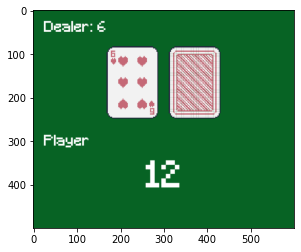

In [1]:
# %pip install numpy==1.20.0
%pip install -U numpy
import matplotlib.pyplot as plt
import gymnasium as gym
import time
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
import pygame
%matplotlib inline

env = gym.make('Blackjack-v1', natural=False, sab=False, render_mode='rgb_array')
env.reset()
fig = plt.figure()
data = env.render()
im = plt.imshow(data, cmap='gist_gray_r', vmin=0, vmax=1)

def init():
    im.set_data(env.render())

def animate(i):
    env.reset()
    im.set_data(env.render())
    time.sleep(0.1)
    return im

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=500,
                               interval=50)

env = gym.make('Blackjack-v1', natural=False, sab=False, render_mode='rgb_array')

/Users/philovie/opt/anaconda3/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:249: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/Users/philovie/opt/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(


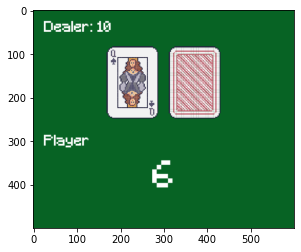

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

frames = []
env.reset()
for _ in range(10):
    action = env.action_space.sample()  # agent policy that uses the observation and info
    observation, reward, terminated, truncated, info = env.step(action)
    frames.append(env.render())
    if terminated or truncated:
        observation, info = env.reset()

env.close()

pygame.init() 

fig = plt.figure()
env.reset()
data = env.render()
im = plt.imshow(data, cmap='gist_gray_r', vmin=0, vmax=1)

def init():
    im.set_data(env.render())

def animate(i):
    env.reset()
    im.set_data(frames[i])
    time.sleep(0.2)
    return im

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(frames),
                               interval=50)

In [4]:
from tqdm import tqdm_notebook
#episode = 100
episode = 500000 # try this second time
trajectories = []

state, info = env.reset() 

win_or_loss = []

for _ in tqdm_notebook(range(episode)):
    trajectory = []
    while True:
        action = env.action_space.sample()  # agent policy that uses the observation and info
        next_state, reward, terminated, truncated, info = env.step(action)
        #print(state, action, reward) # close this if episode is too huge
        trajectory.append( (state, action, reward) )
        
       # frames.append(env.render())
        if terminated or truncated:
            state, info = env.reset()
            
            win_or_loss.append(True if reward > 0 else False)

            trajectories.append(trajectory)
            
            break

env.close()

/var/folders/dr/3bsmb4j928bcx76mh_1dfx1r0000gn/T/ipykernel_1255/3467269370.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _ in tqdm_notebook(range(episode)):


  0%|          | 0/500000 [00:00<?, ?it/s]

In [10]:
trajectories

[[((15, 9, False), 1, -1.0)],
 [((6, 1, False), 1, 0.0), ((6, 1, False), 0, -1.0)],
 [((20, 5, True), 1, 0.0), ((20, 5, True), 1, 0.0), ((20, 5, True), 1, -1.0)],
 [((11, 6, False), 0, -1.0)],
 [((12, 10, False), 1, 0.0), ((12, 10, False), 0, -1.0)],
 [((17, 2, False), 1, 0.0), ((17, 2, False), 0, 1.0)],
 [((15, 5, True), 0, -1.0)],
 [((19, 9, False), 0, 1.0)],
 [((13, 10, False), 0, -1.0)],
 [((19, 10, False), 1, -1.0)],
 [((20, 3, False), 0, 0.0)],
 [((16, 10, True), 1, 0.0), ((16, 10, True), 1, -1.0)],
 [((16, 1, False), 0, -1.0)],
 [((19, 10, False), 1, -1.0)],
 [((20, 5, False), 0, 1.0)],
 [((10, 10, False), 1, 0.0), ((10, 10, False), 1, -1.0)],
 [((20, 6, False), 1, -1.0)],
 [((11, 6, False), 1, 0.0), ((11, 6, False), 0, -1.0)],
 [((16, 2, False), 1, 0.0), ((16, 2, False), 0, 1.0)],
 [((19, 10, False), 1, -1.0)],
 [((12, 10, True), 1, 0.0),
  ((12, 10, True), 1, 0.0),
  ((12, 10, True), 1, 0.0),
  ((12, 10, True), 0, -1.0)],
 [((14, 7, False), 1, -1.0)],
 [((15, 10, False), 1, -1

In [5]:
sum(int(w) for w in win_or_loss) / len(win_or_loss)

0.280754

In [6]:
from collections import defaultdict
import numpy as np

In [10]:
trajectories[:10]

[[((19, 9, False), 0, 1.0)],
 [((16, 10, True), 1, 0.0), ((16, 10, True), 1, -1.0)],
 [((12, 9, False), 0, 1.0)],
 [((15, 10, False), 0, -1.0)],
 [((11, 7, False), 0, -1.0)],
 [((12, 4, False), 0, 1.0)],
 [((12, 6, False), 0, -1.0)],
 [((15, 10, True), 0, -1.0)],
 [((18, 10, False), 1, -1.0)],
 [((14, 7, True), 1, 0.0), ((14, 7, True), 0, 1.0)]]

In [11]:
state_value = defaultdict(list)

for t in trajectories:
#    for s, a, r in t[::-1]:
    G = 0 # goal  / value
    visited = set()
    _gamma = 0.9
    for i, (s, a, r) in enumerate(t[::-1]):  # why do this? 
        G = _gamma * G + r
        if s not in visited:
            state_value[s].append(G)
            visited.add(s)

for s, g in state_value.items():
    state_value[s] = np.mean(g)

In [12]:
state_value

defaultdict(list,
            {(19, 9, False): -0.24493150684931506,
             (16, 10, True): -0.47438752783964366,
             (12, 9, False): -0.6035502958579881,
             (15, 10, False): -0.6563507414571245,
             (11, 7, False): -0.3596881959910913,
             (12, 4, False): -0.38034441805225655,
             (12, 6, False): -0.34509338867477024,
             (15, 10, True): -0.5317855168601437,
             (18, 10, False): -0.5384615384615384,
             (14, 7, True): -0.3802197802197802,
             (13, 2, False): -0.4394035532994924,
             (15, 2, False): -0.5102639296187683,
             (17, 5, False): -0.40480427046263345,
             (8, 7, False): -0.417172593235039,
             (9, 10, False): -0.5680043580897041,
             (12, 5, False): -0.35526315789473684,
             (8, 2, False): -0.2777284826974268,
             (20, 1, False): -0.40605051346100474,
             (15, 3, False): -0.4598150782361309,
             (17, 3, False)

In [13]:
max(state_value.items(), key=lambda x_y: x_y[1])

((21, 6, True), 0.3527214514407684)

In [14]:
state_table_with_ace = np.zeros((30, 11))
state_table_without_ace = np.zeros((30, 11))
state_table_with_ace[:] = np.nan
state_table_without_ace[:] = np.nan

In [15]:
for (player, dealer_show, ace), value in state_value.items(): 
    if ace: 
        state_table_with_ace[player][dealer_show] = value
    else:
        state_table_without_ace[player][dealer_show] = value

In [16]:
%matplotlib inline

Text(0, 0.5, 'Current Player Sum')

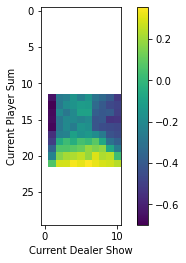

In [18]:
s_value=plt.imshow(state_table_with_ace)
plt.colorbar(s_value)
plt.xlabel('Current Dealer Show')
plt.ylabel('Current Player Sum')

Text(0, 0.5, 'Current Player Sum')

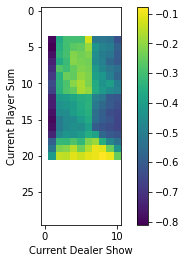

In [19]:
s_value = plt.imshow(state_table_without_ace)
plt.colorbar(s_value)
plt.xlabel('Current Dealer Show')
plt.ylabel('Current Player Sum')

In [20]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
X, Y = np.meshgrid(np.arange(state_table_without_ace.shape[0]), 
                   np.arange(state_table_without_ace.shape[1]))

In [21]:
state_table_without_ace.shape

(30, 11)

In [22]:
def get_z(x, y, ace):
    data_source = state_table_with_ace if ace else state_table_without_ace
    return state_table_without_ace[x][y]

In [23]:
state_table_with_ace.shape

(30, 11)

In [24]:
#X = X[:, 4:21]
Z = np.array([get_z(x,y,ace=False) for x,y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

In [27]:
dir(ax)

['M',
 '_3d_extend_contour',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autoscaleZon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axis3don',
 '_axisbelow',
 '_box_aspect',
 '_button_press',
 '_button_release',
 '_callbacks',
 '_check_no_units',
 '_clipon',
 '_clippath',
 '_colorbars',
 '_contains',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_draw_grid',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_sp

<IPython.core.display.Javascript object>


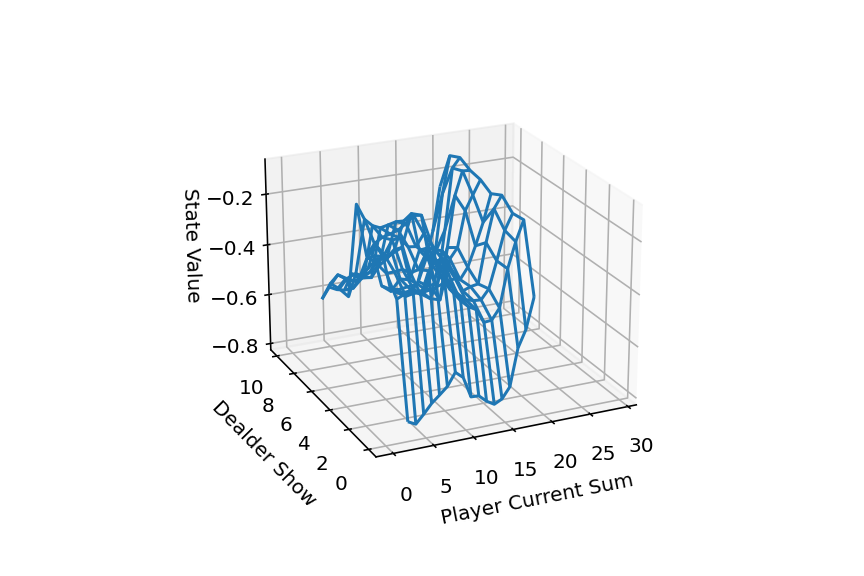

In [26]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

#ax.scatter(X,Y,Z) 
#ax.plot_surface(X, Y, Z)
ax.plot_wireframe(X, Y, Z)

ax.set_xlabel("Player Current Sum")
ax.set_ylabel("Dealder Show")
ax.set_zlabel("State Value")

plt.show()

In [28]:
import random

In [29]:
help(np.random.choice)

Help on built-in function choice:

choice(...) method of numpy.random.mtrand.RandomState instance
    choice(a, size=None, replace=True, p=None)
    
    Generates a random sample from a given 1-D array
    
    .. versionadded:: 1.7.0
    
    .. note::
        New code should use the `~numpy.random.Generator.choice`
        method of a `~numpy.random.Generator` instance instead;
        please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    a : 1-D array-like or int
        If an ndarray, a random sample is generated from its elements.
        If an int, the random sample is generated as if it were ``np.arange(a)``
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    replace : boolean, optional
        Whether the sample is with or without replacement. Default is True,
        meaning th

In [30]:
return_state_action = defaultdict(list)
q_table = defaultdict(lambda : [0, 0])  
# q_table or state_action_value['s1'] = [0.1, -0.2] # for action 0, and action 1

def policy(state): 
    # based on the state, give the action
    return np.argmax(q_table[state])

#for t in tqdm_notebook(np.random.choice(trajectories, size=50000)):
for t in tqdm_notebook(trajectories):
#    for s, a, r in t[::-1]:
    G = 0 # goal  / value
    visited = set()
    _gamma = 0.9
    for i, (s, a, r) in enumerate(t[::-1]):  # why do this? 
        G = _gamma * G + r
        if s not in visited:
            return_state_action[(s, a)].append(G)
            q_table[s][a] = np.mean(return_state_action[(s, a)])            

            visited.add(s)

/var/folders/dr/3bsmb4j928bcx76mh_1dfx1r0000gn/T/ipykernel_1255/110865406.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for t in tqdm_notebook(trajectories):


  0%|          | 0/500000 [00:00<?, ?it/s]

In [31]:
q_table

defaultdict(<function __main__.<lambda>()>,
            {(19, 9, False): [0.35763546798029555, -1.0],
             (16, 10, True): [-0.39757498404594765, -1.0],
             (12, 9, False): [-0.4334038054968288, -1.0],
             (15, 10, False): [-0.4488921713441654, -1.0],
             (11, 7, False): [-0.18091168091168092, -1.0],
             (12, 4, False): [-0.12421317666806546, -1.0],
             (12, 6, False): [-0.05799573560767591, -1.0],
             (15, 10, True): [-0.45705128205128204, -1.0],
             (18, 10, False): [-0.18566775244299674, -1.0],
             (14, 7, True): [-0.3054187192118227, -1.0],
             (13, 2, False): [-0.16176470588235295, -1.0],
             (15, 2, False): [-0.19807923169267708, -1.0],
             (17, 5, False): [0.03161141094834233, -1.0],
             (8, 7, False): [-0.29411764705882354, -1.0],
             (9, 10, False): [-0.46932857461521305, -1.0],
             (12, 5, False): [-0.08262108262108261, -1.0],
             (8, 

In [37]:
episode = 500000 # try this second time
trajectories = []

state, info = env.reset() 

win_or_loss = []

for _ in tqdm_notebook(range(episode)):
    trajectory = []
    while True:
        action = env.action_space.sample()  # agent policy that uses the observation and info
#         action = policy(state)
        next_state, reward, terminated, truncated, info = env.step(action)
        #print(state, action, reward) # close this if episode is too huge
        trajectory.append( (state, action, reward) )
        
       # frames.append(env.render())
        if terminated or truncated:
            state, info = env.reset()
            
            win_or_loss.append(True if reward > 0 else False)

            trajectories.append(trajectory)
            
            break

env.close()

/var/folders/dr/3bsmb4j928bcx76mh_1dfx1r0000gn/T/ipykernel_1255/1305308514.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _ in tqdm_notebook(range(episode)):


  0%|          | 0/500000 [00:00<?, ?it/s]

In [38]:
sum(int(w) for w in win_or_loss) / len(win_or_loss)

0.280974

In [34]:
episode = 500000 # try this second time
trajectories = []

state, info = env.reset() 

win_or_loss = []

def policy(state, eps=0.15): 
    # based on the state, give the action
    if random.random() < eps: 
        return np.random.choice(len(q_table[state]))
    else:
        return np.argmax(q_table[state])

for _ in tqdm_notebook(range(episode)):
    trajectory = []
    while True:
        #action = env.action_space.sample()  # agent policy that uses the observation and info
        action = policy(state)
        next_state, reward, terminated, truncated, info = env.step(action)
        #print(state, action, reward) # close this if episode is too huge
        trajectory.append( (state, action, reward) )
        
       # frames.append(env.render())
        if terminated or truncated:
            state, info = env.reset()
            
            win_or_loss.append(True if reward > 0 else False)

            trajectories.append(trajectory)
            
            break

env.close()

/var/folders/dr/3bsmb4j928bcx76mh_1dfx1r0000gn/T/ipykernel_1255/2488269249.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _ in tqdm_notebook(range(episode)):


  0%|          | 0/500000 [00:00<?, ?it/s]

In [36]:
sum(int(w) for w in win_or_loss) / len(win_or_loss)

0.372894

In [39]:
episode = 900000 # try this second time
trajectories = []

state, info = env.reset() 

win_or_loss = []

def policy(state, eps=0.15): 
    # based on the state, give the action
    if random.random() < eps: 
        return np.random.choice(len(q_table[state]))
    else:
        return np.argmax(q_table[state])

G = 0        
visited = set()         
_gamma = 0.9

for _ in tqdm_notebook(range(episode)):
    trajectory = []
    while True:
        #action = env.action_space.sample()  # agent policy that uses the observation and info
        action = policy(state)
        next_state, reward, terminated, truncated, info = env.step(action)
        #print(state, action, reward) # close this if episode is too huge
        trajectory.append( (state, action, reward) )
        
        G = _gamma * G + r
        if s not in visited:
            return_state_action[(s, a)].append(G)
            q_table[s][a] = np.mean(return_state_action[(s, a)])            

            visited.add(s)
        
       # frames.append(env.render())
        if terminated or truncated:
            
            state, info = env.reset()
            
            win_or_loss.append(True if reward > 0 else False)

            trajectories.append(trajectory)
            
            G = 0
            
            visited = set()
            
            _gamma = 0.9
            
            break

env.close()

/var/folders/dr/3bsmb4j928bcx76mh_1dfx1r0000gn/T/ipykernel_1255/1143474004.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _ in tqdm_notebook(range(episode)):


  0%|          | 0/900000 [00:00<?, ?it/s]

In [40]:
sum(int(w) for w in win_or_loss) / len(win_or_loss)

0.3726522222222222